# 영화 리뷰 분류 : 이진 분류 예제

## IMDB 데이터셋
인터넷 영화 데이터베이스로부터 가져온 양극단의 리뷰 5만개로 이루어진 데이터셋입니다.<br>
훈련 데이터 25,000개와 테스트 데이터 25,000개로 나뉘어 있고 각각 50%의 부정과 긍정 리뷰로 구성되어 있습니다.

### 훈련 데이터와 테스트 데이터를 나누는 이유?
훈련 데이터에서 잘 작동한다고 테스트 데이터에서도 잘 작동한다는 것을 보장하지 않습니다.

In [1]:
# IMDB 데이터셋 로드하기
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# 가장 자주 나타나는 단어 1만개 만을 사용합니다.

Using TensorFlow backend.


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

train_labels와 test_labels는 <strong>부정</strong>을 나타내는 0과 <strong>긍정</strong>을 나타내는 1의 리스트입니다.

In [3]:
train_labels[0] # 긍정적 리뷰

1

In [4]:
max([max(sequnce) for sequnce in train_data])

9999

In [5]:
# decoding
word_index = imdb.get_word_index()# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [6]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [7]:
# 0, 1, 2는 '패딩', '문서시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다.
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 데이터 준비
신경망에 숫자 리스트를 주입할 수 없으므로 리스트를 텐서로 바꿉니다.

### 리스트를 텐서로 바꾸는 두가지 방법
- 같은 길이가 되도록 리스트에 패딩을 추가하고 (sequence, sequnece_length) 크기의 정수 텐서로 변환한 후 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번째 층으로 사용합니다.
- 리스트를 원-핫 인코딩하여 0과 1의 벡터로 변환합니다.

In [8]:
# 정수 시퀀스를 이진 행렬로 인코딩하기
import numpy as np

def vectorize_sequence(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.# results[i]에서 특정 인덱스의 위치를 1로 만듭니다.
    return results

x_train = vectorize_sequence(train_data)# 훈련 데이터를 벡터로 변환합니다.
x_test = vectorize_sequence(test_data)# 테스트 데이터를 벡터로 변환합니다.

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
# 레이블을 벡터로 변경하기
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 신경망 모델 만들기
Dense 층을 쌓을 때 두가지 결정
- 얼마나 많은 층을 사용할 것인가?
- 각 층에 얼마나 많은 은닉 유닛을 둘 것인가?

In [11]:
# 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

이진 분류 문제이며 신경망의 출력이 확률이기 때문에 binarry_crossentropy 손실 함수를 사용합니다.

확률을 출력하는 모델을 사용할 때는 Crossentropy가 최선의 선택입니다.

<strong>Crossentropy :</strong> 확률 분포 간의 차이를 측정합니다.

In [12]:
# 모델 컴파일하기
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrix=['accuracy'])

In [13]:
# 손실과 측정을 함수 객체로 측정하기
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

## 훈련 검증
훈련하는 동안 처음 본 데이터에 대한 정확도를 측정하기 위해 원본 훈련 데이터에서 10,000개의 샘플을 떼어 검증 세트를 만들어야 합니다.

In [14]:
# 검증 세트 준비하기
x_val = x_train[:10000]
partial_x_val = x_train[10000:]# train_data
y_val = y_train[:10000]
partial_y_val = y_train[10000:]# train_labels

In [16]:
#모델 훈련하기
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_val, partial_y_val, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.4947 - acc: 0.7887 - val_loss: 0.3751 - val_acc: 0.8642
Epoch 2/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.2901 - acc: 0.9041 - val_loss: 0.2944 - val_acc: 0.8901
Epoch 3/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.2155 - acc: 0.9279 - val_loss: 0.2803 - val_acc: 0.8887
Epoch 4/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.1695 - acc: 0.9455 - val_loss: 0.2819 - val_acc: 0.8879
Epoch 5/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.1384 - acc: 0.9567 - val_loss: 0.3080 - val_acc: 0.8768
Epoch 6/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.1114 - acc: 0.9651 - val_loss: 0.2973 - val_acc: 0.8851
Epoch 7/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.0952 - acc: 0.9709 - val_loss: 0.3383 - 

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

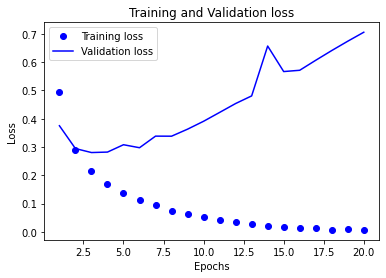

In [19]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

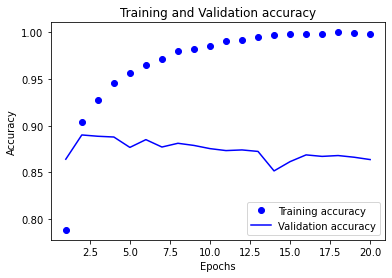

In [21]:
# 훈련과 검증 정확도 그리기
plt.clf()# 그래프 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

4번째 에포그에서 overfitting이 발생합니다. 두 번째 에포크 이후부터 훈련 데이터에 과도하게 최적화되어 훈련 세트 이외의 데이터에 일반화되지 못합니다.

overfitting을 방지하기 위해 세 번째 에포크 이후 훈련을 중지합니다.

네 번의 에포크 동안만 훈련하고 테스트 데이터에서 평가해 보겠습니다.

In [42]:
# 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.fit(x_train, y_train, epochs=4, batch_size = 512)
results= model.evaluate(x_test,y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.4629 - acc: 0.8228
Epoch 2/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.2636 - acc: 0.9091
Epoch 3/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.2017 - acc: 0.9282
Epoch 4/4
25000/25000 [==============================] - 1s 33us/step


In [43]:
results

[0.2931569806098938, 0.8844000101089478]

## 훈련된 모델로 새로운 데이터에 대해 예측하기

In [44]:
model.predict(x_test)

array([[0.2688542 ],
       [0.9999397 ],
       [0.8765924 ],
       ...,
       [0.1498676 ],
       [0.07885665],
       [0.70683324]], dtype=float32)

## 추가 실험
- 3개의 은닉층을 사용
- 층의 은닉 유닛을 줄이거나 추가
- relu 대신 tanh 활성화 함수 사용

In [54]:
model = models.Sequential()

model.add(layers.Dense(32,activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=10, batch_size=512)
result = model.evaluate(x_test,y_test)

Epoch 1/10
25000/25000 [==============================] - 2s 88us/step - loss: 0.4034 - acc: 0.8259
Epoch 2/10
25000/25000 [==============================] - 2s 83us/step - loss: 0.2236 - acc: 0.9151
Epoch 3/10
25000/25000 [==============================] - 2s 83us/step - loss: 0.1752 - acc: 0.9350
Epoch 4/10
25000/25000 [==============================] - 2s 82us/step - loss: 0.1498 - acc: 0.9446
Epoch 5/10
25000/25000 [==============================] - 2s 83us/step - loss: 0.1251 - acc: 0.9556
Epoch 6/10
25000/25000 [==============================] - 2s 84us/step - loss: 0.1128 - acc: 0.9586
Epoch 7/10
25000/25000 [==============================] - 2s 84us/step - loss: 0.0969 - acc: 0.9640
Epoch 8/10
25000/25000 [==============================] - 2s 84us/step - loss: 0.0901 - acc: 0.9660
Epoch 9/10
25000/25000 [==============================] - 2s 83us/step - loss: 0.0788 - acc: 0.9716
Epoch 10/10
25000/25000 [==============================] - 1s 35us/step


In [57]:
result

[0.5087255360352994, 0.8590400218963623]

In [51]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc'])

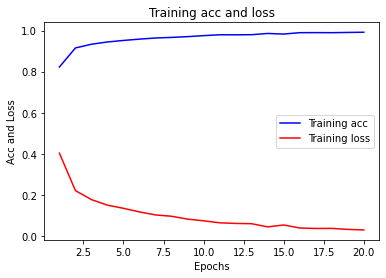

In [59]:
acc = history_dict['acc']
loss = history_dict['loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training acc and loss')
plt.xlabel('Epochs')
plt.ylabel('Acc and Loss')
plt.legend()

plt.show()


In [62]:
model.predict(x_test)

array([[0.01636252],
       [0.9984264 ],
       [0.9852609 ],
       ...,
       [0.4121024 ],
       [0.01266688],
       [0.99231935]], dtype=float32)